In [3]:
using SharedArrays
using Distributed
using Plots
using PyCall
using Random
using JLD
ws = load("/home/sgillen/work/seajul/data/hm15.jld")
#ws2 = load("/home/sgillen/work/lorenz/run_ars/data/hm1.jld")
env_name = "Humanoid-v2"
gym = pyimport("gym")
env = gym.make(env_name)
in_size = env.observation_space.shape[1]
out_size = env.action_space.shape[1]
    

17

In [4]:
function do_rollout_eval(env::PyObject, W, mu, std)
    x = env.reset()
    done = false
    reward = 0.0

    x_hist = zeros(env.observation_space.shape[1],env._max_episode_steps)
    a_hist = zeros(env.action_space.shape[1],env._max_episode_steps)
    i = 1

    act_low = convert(Array{Float64,1}, env.action_space.low)
    act_high = convert(Array{Float64,1}, env.action_space.high)

    while !done
        x_hist[:,i] = copy(x);
        u = clamp(W*((x - mu)./std), act_low, act_high)
        a_hist[:,i] = copy(u);
        x, r, done, _ = env.step(u)
        env.render()
        sleep(0.01)
        i+=1
        reward += r
    end
    #println(vec(mean(x_hist[:,1:i-1],dims=2)))
    return reward::Float64, x_hist, a_hist
end

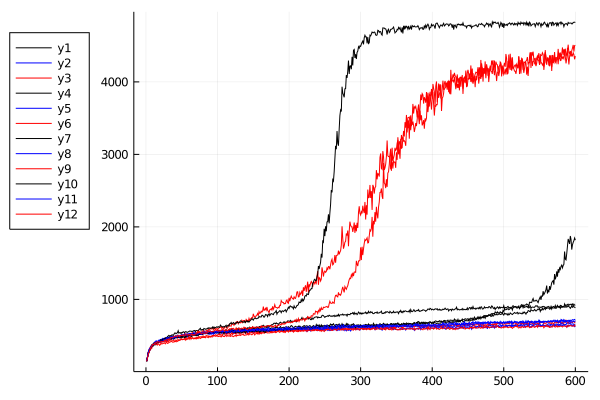

In [6]:
using Plots

plot()
for i in 1:4
    plot!(ws["Ra"][i,:], color=:black)
    plot!(ws["TRb"][i,:], color=:blue)
    plot!(ws["TRc"][i,:], color=:red)
end
plot!(legend = :outertopleft)

In [9]:
R,X,A = do_rollout_eval(env, ws["Wc"][1,:,:],ws["MUc"][1,:],ws["SIGc"][1,:])

(4849.545074117794, [1.3962623686784579 1.39538800845955 … 1.0904403754322918 1.088797013737879; 0.9999481506811059 0.9999481594963523 … 0.812376929785204 0.8122401275566933; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.1179583406842049 -0.1434937822909501 … -0.04370317262521113 0.4000000059604645; 1.4508744014064547 1.412870582324388 … -0.2587464808088683 0.4000000059604645; … ; -0.5986744873202305 -0.8478198679937398 … -0.5248319862727014 0.4000000059604645; -1.5552091031752153 -1.4137412898711812 … 0.6879926438351606 0.4000000059604645])

In [ ]:
R,X,A = do_rollout_eval(env, ws2["Wa"][2,:,:],ws2["MUa"][2,:],ws2["SIGa"][2,:])

In [10]:
ws["SIGc"][1,1,1]

0.05707023649054427

In [28]:
x

UndefVarError: UndefVarError: x not defined